# Plotting mints in `nomisma` against vector overlays 


## Import libraries

In [8]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily
import matplotlib.pyplot as plt

## Load location data for mints

In [9]:
URL = "https://raw.githubusercontent.com/neelsmith/nomisma/master/tables/mintpoints.csv"
FILE_HEADER = ['mint','lon','lat']
USE_COLS = ['mint','lon','lat']
df = pd.read_csv(
    URL, delimiter=",",
    names=FILE_HEADER, 
    usecols=USE_COLS,
    header=1
    )

In [10]:
from shapely.geometry import Point
mints = geopandas.GeoDataFrame(
    df.drop(['lon', 'lat'], axis=1),
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(df.lon, df.lat)]
)


## Visualize with `contextily`

The `contextily` library requires the Web Mercator projection (3857 in the [EPSG registry](http://www.epsg.org/)).

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


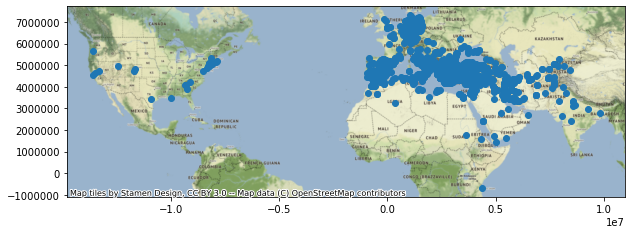

In [11]:
mintsWebMercator = mints.to_crs(epsg=3857)
ctxable = mintsWebMercator.plot(figsize=(10, 6))
contextily.add_basemap(ctxable)

## Map projection

In [12]:
import geoplot
import geoplot.crs as gcrs
from cartopy import crs as ccrs

In [13]:
crs = ccrs.AlbersEqualArea()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
mints_ae = mints.to_crs(crs_proj4)



/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


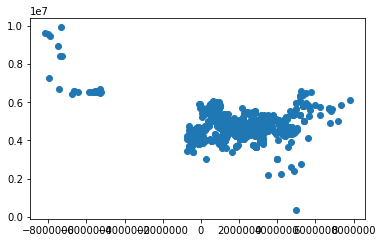

In [14]:
mints_ae.plot()

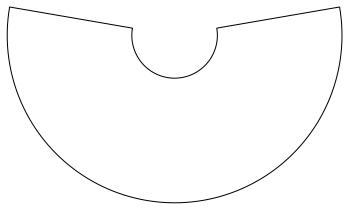

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})

In [16]:
ax.add_geometries(mints_ae['geometry'], crs=crs)

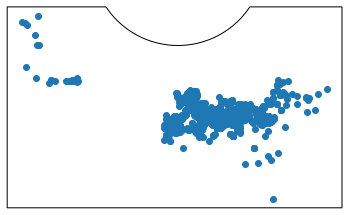

In [17]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
mints_ae['geometry'].plot(ax=ax)

## Load countries/coastline vector data

We load a copy (downloaded on Dec. 20, 2019) of the public-domain data set from [Natural Earth](https://www.naturalearthdata.com/) with current national boundaries.

In [4]:
COASTDATA = "http://shot.holycross.edu/ne_110m_admin_0_countries.zip"
coasts = geopandas.read_file(COASTDATA)

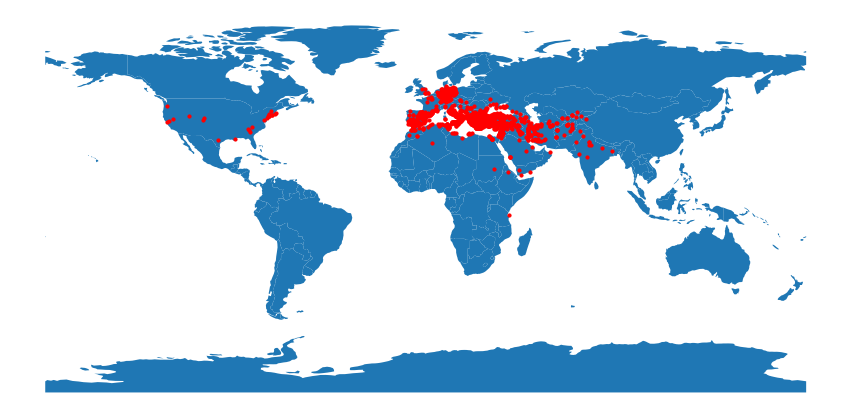

In [7]:
ax = coasts.plot(figsize=(15, 15))
mints.plot(ax=ax, color='red', markersize=10)
ax.set_axis_off()

[(-5, 60), (-5, 90)]

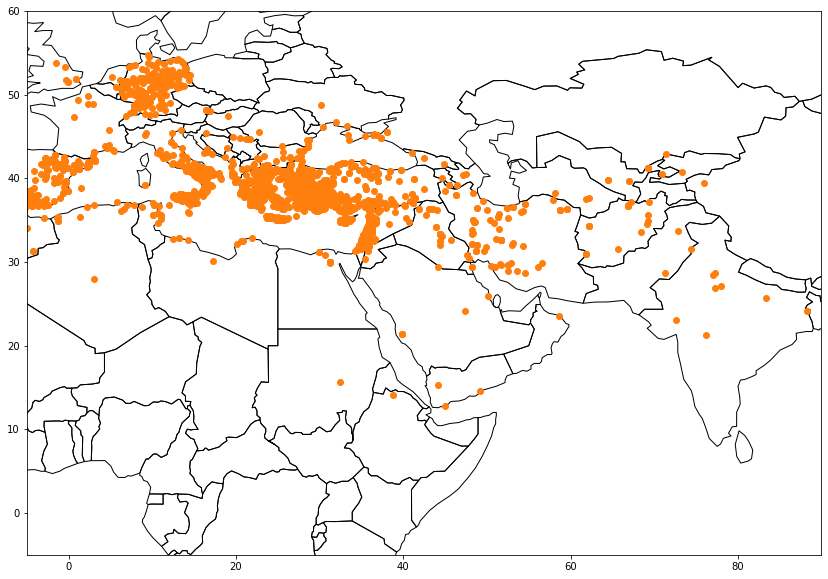

In [19]:
ax = coasts.plot(edgecolor='k', facecolor='none', figsize=(15, 10))

mints.plot(ax=ax, color='C1')
ax.set(xlim=(-5, 90), ylim=(-5, 60))